In [1]:
#set depdendies
import pandas as pd
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as sns; sns.set(color_codes=True)
from scipy import stats

In [2]:
url = "https://api.datausa.io/api/?sort=desc&show=geo&required=grads_total&sumlevel=state&cip=26&year=all"

In [3]:
# Make an API call to the API and convert response object to JSON
json = requests.get(url).json()

In [4]:
#see the data
#json

In [5]:
# Converting the response to JSON
data = [dict(zip(json["headers"], d)) for d in json["data"]]

In [6]:
x =data[0]

In [7]:
# explore the structure of the returned JSON object
json['headers']

['year', 'geo', 'cip', 'grads_total']

In [8]:
r = requests.get(url)
x = r.json()
biology_df = pd.DataFrame(data)

biology_df.head()

,cip,geo,grads_total,year
0,26,04000US01,1786,2013
1,26,04000US02,138,2013
2,26,04000US04,2316,2013
3,26,04000US05,754,2013
4,26,04000US06,16046,2013


In [9]:
biology_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 4 columns):
cip            162 non-null object
geo            162 non-null object
grads_total    162 non-null int64
year           162 non-null int64
dtypes: int64(2), object(2)
memory usage: 5.1+ KB


In [10]:
biology_df['geo'][0][-2:]

'01'

In [11]:
# make a new column that takes just the last two digits
biology_df['State'] = biology_df['geo'].str[-2:]
biology_df.head()

,cip,geo,grads_total,year,State
0,26,04000US01,1786,2013,01
1,26,04000US02,138,2013,02
2,26,04000US04,2316,2013,04
3,26,04000US05,754,2013,05
4,26,04000US06,16046,2013,06


In [12]:
biology_df.dtypes

cip            object
geo            object
grads_total     int64
year            int64
State          object
dtype: object

In [13]:
code_df = pd.read_csv("/Users/RoFo/Dropbox/Data_Science_BC/codes.csv")
#code_df = code_df.drop('Unnamed: 2', 1)
#changed it into an object
code_df['Code'] = code_df['Code'].apply('{:0>2}'.format)
code_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
Code     54 non-null object
State    54 non-null object
dtypes: object(2)
memory usage: 944.0+ bytes


In [14]:
code_df.dtypes

Code     object
State    object
dtype: object

In [15]:
# grad_merge = final graduate data set
merged_df = biology_df.merge(code_df, left_on='State', right_on='Code', how='outer')
grad_merge_df = merged_df.drop(['cip','geo','State_x','Code'], axis=1)
grad_merge_df

,grads_total,year,State_y
0,1786,2013,Alabama
1,1834,2014,Alabama
2,1847,2015,Alabama
3,138,2013,Alaska
4,134,2014,Alaska
5,149,2015,Alaska
6,2316,2013,Arizona
7,2375,2014,Arizona
8,2572,2015,Arizona
9,754,2013,Arkansas


In [16]:
#now merge brewery data sets (Brewery and Convert)
Brewery_df = pd.read_csv("/Users/RoFo/Dropbox/Data_Science_BC/Brewery.csv")
Brewery_df = Brewery_df.rename(columns={'Unnamed: 0': 'State'})
Brewery_df.head()

,State,2013,2014,2015
0,AK,25,28,35
1,AL,23,25,30
2,AR,18,23,29
3,AZ,59,77,91
4,CA,528,654,788


In [17]:
Convert_df = pd.read_csv("/Users/RoFo/Dropbox/Data_Science_BC/Convert.csv")
Convert_df = Convert_df.rename(columns={'Abbreviation': 'State Ab', 'FullStateName' : 'Full State Name'})
Convert_df.head()

,State Ab,Full State Name
0,AL,Alabama
1,AK,Alaska
2,AZ,Arizona
3,AR,Arkansas
4,CA,California


In [18]:
#final_beer_merge = final brewery data set
the_merged_brew_df = Brewery_df.merge(Convert_df, left_on='State', right_on='State Ab', how='outer')
final_beer_merge_df = the_merged_brew_df.drop(['State Ab'], axis=1)
final_beer_merge_df.head()

,State,2013,2014,2015,Full State Name
0,AK,25.0,28.0,35.0,Alaska
1,AL,23.0,25.0,30.0,Alabama
2,AR,18.0,23.0,29.0,Arkansas
3,AZ,59.0,77.0,91.0,Arizona
4,CA,528.0,654.0,788.0,California


In [19]:
final_beer_merge_df.dtypes

State               object
2013               float64
2014               float64
2015               float64
Full State Name     object
dtype: object

In [20]:
grad_merge_df.dtypes

grads_total     int64
year            int64
State_y        object
dtype: object

In [21]:
print(type(final_beer_merge_df))

<class 'pandas.core.frame.DataFrame'>


In [22]:
final_beer_merge_df.columns

Index(['State', '2013', '2014', '2015', 'Full State Name'], dtype='object')

In [23]:
grad_merge_df.columns

Index(['grads_total', 'year', 'State_y'], dtype='object')

In [24]:
print(type(grad_merge_df))

<class 'pandas.core.frame.DataFrame'>


In [25]:
#get big data set --> merge final_beer_merge and grad_merge data sets
bio_beer_df= final_beer_merge_df.merge(grad_merge_df, left_on='Full State Name', right_on='State_y', how='outer')

In [26]:
bio_beer_df.head()

,State,2013,2014,2015,Full State Name,grads_total,year,State_y
0,AK,25.0,28.0,35.0,Alaska,138.0,2013.0,Alaska
1,AK,25.0,28.0,35.0,Alaska,134.0,2014.0,Alaska
2,AK,25.0,28.0,35.0,Alaska,149.0,2015.0,Alaska
3,AL,23.0,25.0,30.0,Alabama,1786.0,2013.0,Alabama
4,AL,23.0,25.0,30.0,Alabama,1834.0,2014.0,Alabama


In [27]:
bio_beer_df = bio_beer_df[['State', 'Full State Name', 'year', '2013', '2014', '2015', 'grads_total']]
bio_beer_df = bio_beer_df.rename(columns={'2013': '2013 Brew', '2014' : '2014 Brew', '2015' : '2015 Brew'})

In [28]:
#itterows
grads_2013 = []

summary_beers = bio_beer_df

for index, row in summary_beers.iterrows():
    if row["year"] == 2013.0:
        placeholder = row["grads_total"]
        summary_beers.loc[index,"2013_grads"] = placeholder
    elif row["year"] == 2014.0:
        placeholder = row["grads_total"]
        summary_beers.loc[index-1,"2014_grads"] = placeholder
    elif row["year"] == 2015.0:
        placeholder = row["grads_total"]
        summary_beers.loc[index-2,"2015_grads"] = placeholder

summary_beers = summary_beers.dropna(axis=0, how="any")
summary_beers = summary_beers.set_index("State")
summary_beers.head()

,Full State Name,year,2013 Brew,2014 Brew,2015 Brew,grads_total,2013_grads,2014_grads,2015_grads
State,,,,,,,,,
AK,Alaska,2013.0,25.0,28.0,35.0,138.0,138.0,134.0,149.0
AL,Alabama,2013.0,23.0,25.0,30.0,1786.0,1786.0,1834.0,1847.0
AR,Arkansas,2013.0,18.0,23.0,29.0,754.0,754.0,892.0,882.0
AZ,Arizona,2013.0,59.0,77.0,91.0,2316.0,2316.0,2375.0,2572.0
CA,California,2013.0,528.0,654.0,788.0,16046.0,16046.0,16649.0,16972.0


In [29]:
pop_df = pd.read_csv("/Users/RoFo/Dropbox/Data_Science_BC/pop.csv")
pop_beer = summary_beers.merge(pop_df, left_on='Full State Name', right_on='Unnamed: 0', how='outer')
pop_beer = pop_beer.drop('Unnamed: 0', 1)
pop_beer = pop_beer.drop('year', 1)
pop_beer.head()

,Full State Name,2013 Brew,2014 Brew,2015 Brew,grads_total,2013_grads,2014_grads,2015_grads,2013 Pop,2014 Pop,2015 Pop
0,Alaska,25.0,28.0,35.0,138.0,138.0,134.0,149.0,737442,737046,738432
1,Alabama,23.0,25.0,30.0,1786.0,1786.0,1834.0,1847.0,4830533,4846411,4858979
2,Arkansas,18.0,23.0,29.0,754.0,754.0,892.0,882.0,2957957,2966835,2978204
3,Arizona,59.0,77.0,91.0,2316.0,2316.0,2375.0,2572.0,6630799,6728783,6828065
4,California,528.0,654.0,788.0,16046.0,16046.0,16649.0,16972.0,38414128,38792291,39144818


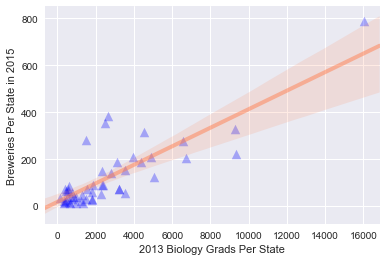

In [51]:
dork_beer = pop_beer.rename(columns={'2013_grads': '2013 Biology Grads Per State', '2015 Brew' : 'Breweries Per State in 2015'})
g = sns.regplot(x="2013 Biology Grads Per State", y="Breweries Per State in 2015", data=dork_beer,
    scatter_kws={"color":"blue","alpha":0.3,"s":90},
    line_kws={"color":"coral","alpha":0.5,"lw":4},marker="^")

plt.savefig("second.figure.png") 

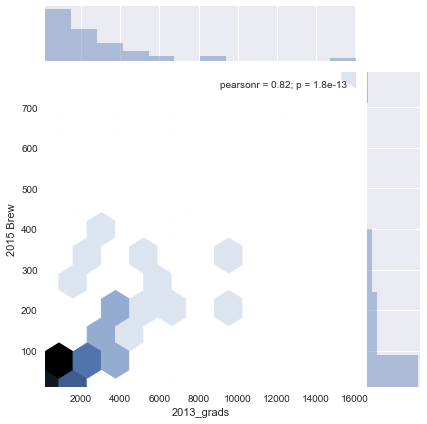

In [49]:
sns.jointplot(x='2013_grads', y='2015 Brew', data=pop_beer,  kind = "hex")
plt.savefig("figure.png") 

In [33]:
brew_2013 = (pop_beer["2013 Brew"]/pop_beer["2013 Pop"])*10000
brew_2014 = (pop_beer["2014 Brew"]/pop_beer["2014 Pop"])*10000
brew_2015 = (pop_beer["2015 Brew"]/pop_beer["2015 Pop"])*10000
grad_2013 = (pop_beer["2013_grads"]/pop_beer["2013 Pop"])*10000
grad_2014 = (pop_beer["2014_grads"]/pop_beer["2014 Pop"])*10000
grad_2015 = (pop_beer["2015_grads"]/pop_beer["2015 Pop"])*10000

beer_data = {"State Name": pop_beer['Full State Name'],"Breweries Per Capita 2013" : brew_2013,
             "Breweries Per Capita 2014" : brew_2014, "Breweries Per Capita 2015" : brew_2015, 
             "Graduates Per Capita 2013" : grad_2013, "Graduates Per Capita 2014" : grad_2014, 
             "Graduates Per Capita 2015" : grad_2015 }

big_beer = pd.DataFrame(beer_data)
#big_beer = big_beer.set_index("State Name")
big_beer.sort_values("Breweries Per Capita 2015", ascending=False).reset_index()

,index,Breweries Per Capita 2013,Breweries Per Capita 2014,Breweries Per Capita 2015,Graduates Per Capita 2013,Graduates Per Capita 2014,Graduates Per Capita 2015,State Name
0,46,0.717556,0.813700,1.054242,6.968263,7.083972,7.635270,Vermont
1,26,0.483043,0.605911,0.716395,3.972784,4.417289,4.172520,Montana
2,37,0.560077,0.614424,0.697448,3.757609,4.064261,4.008462,Oregon
3,5,0.443927,0.560163,0.645093,4.699180,5.155363,5.228556,Colorado
4,21,0.451543,0.533732,0.631898,4.665941,5.051659,4.912256,Maine
5,47,0.381456,0.444560,0.534144,3.797352,4.009533,4.302439,Washington
6,0,0.339010,0.379895,0.473977,1.871334,1.818068,2.017789,Alaska
7,30,0.264618,0.346387,0.473468,4.211211,4.631038,5.102930,New Hampshire
8,13,0.260419,0.311964,0.344425,4.575935,4.905781,5.178467,Idaho
9,32,0.230007,0.287692,0.340510,2.731337,2.900890,2.834384,New Mexico


In [52]:
growth_brew = brew_2015-brew_2013
growth_bio = grad_2015-grad_2013
growth_data = {"Grad Growth": pop_beer['Full State Name'],
               "Growth in Breweries Per Capita" : growth_brew,
               "Growth in Bio Grads Per Capita" : growth_bio}
growth_beer = pd.DataFrame(growth_data)
growth_beer.sort_values("Growth in Bio Grads Per Capita", ascending=False).reset_index()

,index,Grad Growth,Growth in Bio Grads Per Capita,Growth in Breweries Per Capita
0,19,Massachusetts,1.030036,0.060275
1,39,Rhode Island,0.925935,0.028030
2,30,New Hampshire,0.891720,0.208849
3,7,District of Columbia,0.866125,0.024036
4,46,Vermont,0.667007,0.336687
5,13,Idaho,0.602531,0.084006
6,12,Iowa,0.596229,0.052648
7,40,South Carolina,0.591231,0.041251
8,23,Minnesota,0.541347,0.120309
9,5,Colorado,0.529375,0.201166


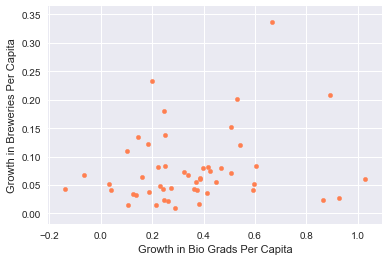

In [35]:
growth_beer.plot.scatter('Growth in Bio Grads Per Capita', 'Growth in Breweries Per Capita', marker="o", color = 'coral')

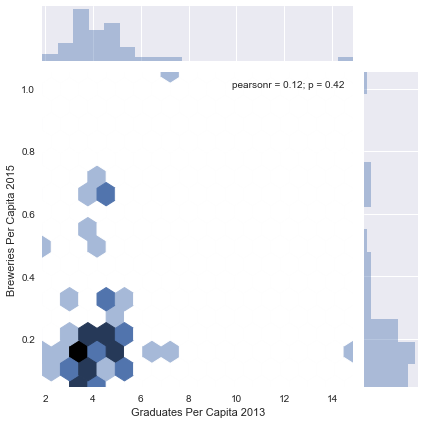

In [37]:
sns.jointplot(x='Graduates Per Capita 2013', y='Breweries Per Capita 2015', data=big_beer,  kind = "hex")
plt.savefig("figure.png") 